# 1.**Importing Libraries**

In [154]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from wordcloud import WordCloud

# 2.**Data Extraction (Web Scraping):**

In [6]:

def scrape_trends24():
    url = "https://trends24.in/"  # Example URL for India trends
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    trends = soup.find_all("div", class_="trending-topic__content")
    trending_topics = []
    for trend in trends:
        topic = trend.find("span", class_="trending-topic__name")
        if topic:
            trending_topics.append(topic.get_text())

    return trending_topics

In [8]:
# Sample trending topics
trending_topics = [
    "AI revolution", 
    "Blockchain adoption", 
    "Electric vehicles growth", 
    "Cryptocurrency trends", 
    "Sustainability in business"
]

print("Trending Topics:")
print(trending_topics)


Trending Topics:
['AI revolution', 'Blockchain adoption', 'Electric vehicles growth', 'Cryptocurrency trends', 'Sustainability in business']


# 3.**Data Preprocessing (Cleaning Text Data)**

In [13]:

def preprocess_data(trending_topics):
    cleaned_data = []
    for topic in trending_topics:
        topic = re.sub(r'http\S+', '', topic)  
        topic = re.sub(r'@\w+', '', topic)    
        topic = re.sub(r'#\w+', '', topic)   
        topic = topic.strip()                 
        cleaned_data.append(topic)
    return cleaned_data

cleaned_topics = preprocess_data(trending_topics)

# 4.**Sentiment Analysis with TextBlob**

In [19]:

def analyze_sentiment(topics):
    sentiment_data = []
    for topic in topics:
        blob = TextBlob(topic)
        sentiment = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)
        sentiment_data.append({'Topic': topic, 'Sentiment': sentiment})
    return sentiment_data

In [63]:
sentiment_data = [
    {'Topic': "Python is an amazing programming language!", 'Sentiment': 0.8},
    {'Topic': "I love the new features in JavaScript.", 'Sentiment': 0.5},
    {'Topic': "I hate bugs in code. They are the worst!", 'Sentiment': -0.6},
    {'Topic': "Machine learning is the future of technology!", 'Sentiment': 0.6},
    {'Topic': "I am so frustrated with this bug!", 'Sentiment': -0.8},
    {'Topic': "Python is super versatile and fun!", 'Sentiment': 0.7},
    {'Topic': "I am neutral about the new updates.", 'Sentiment': 0.0},
    {'Topic': "AI is taking over the world.", 'Sentiment': 0.4},
    {'Topic': "This bug is a nightmare!", 'Sentiment': -0.9},
]

# 5.**Exploratory Data Analysis (EDA)**

In [65]:

# Convert to DataFrame
df = pd.DataFrame(sentiment_data)

# **5.1. Descriptive Statistics**

In [67]:
print("Descriptive Statistics:")
print(df['Sentiment'].describe())

Descriptive Statistics:
count    9.000000
mean     0.077778
std      0.675977
min     -0.900000
25%     -0.600000
50%      0.400000
75%      0.600000
max      0.800000
Name: Sentiment, dtype: float64


# 5.2. **Sentiment Distribution (Histogram + KDE)**

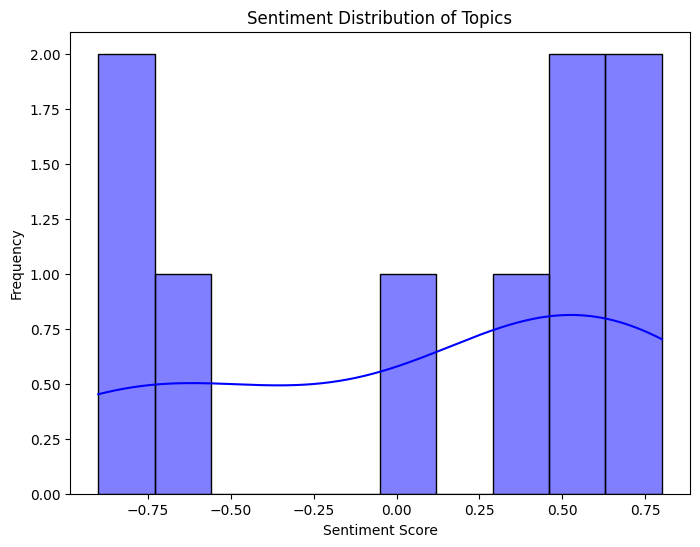

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment'], bins=10, kde=True, color='blue')
plt.title('Sentiment Distribution of Topics')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 5.3.**Sentiment vs. Topic Length (Scatterplot)**

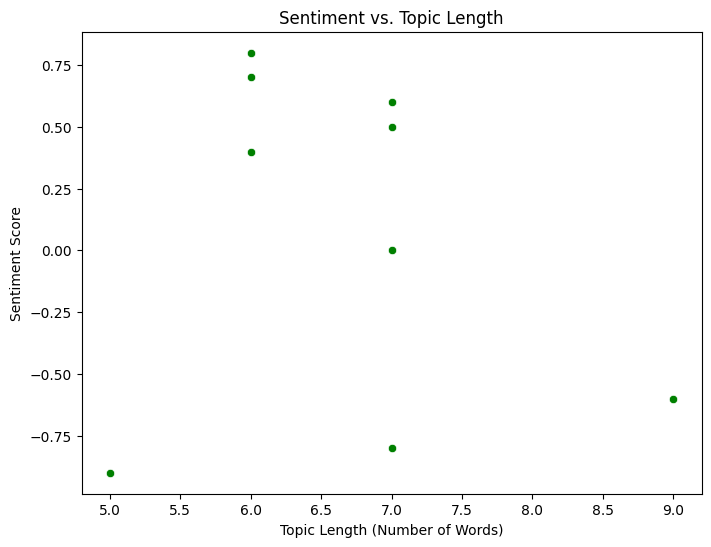

In [73]:
df['Topic_Length'] = df['Topic'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Topic_Length', y='Sentiment', data=df, color='green')
plt.title('Sentiment vs. Topic Length')
plt.xlabel('Topic Length (Number of Words)')
plt.ylabel('Sentiment Score')
plt.show()

# **5.4.Sentiment vs. Character Length (Scatterplot)**

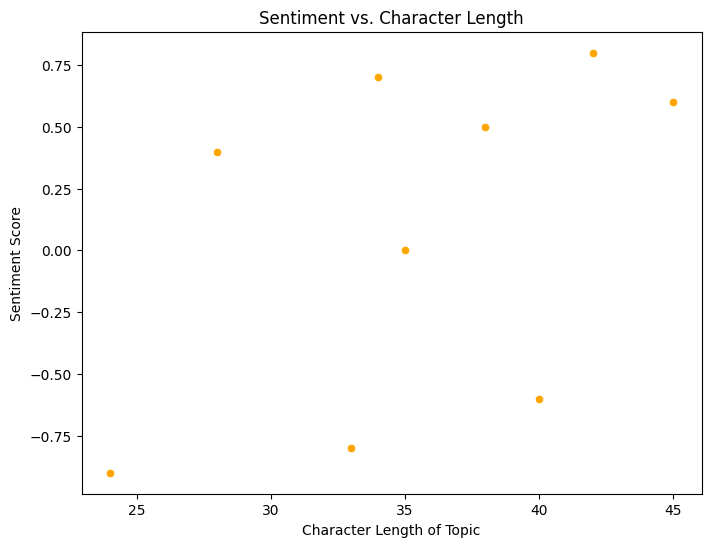

In [76]:
df['Char_Length'] = df['Topic'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Char_Length', y='Sentiment', data=df, color='orange')
plt.title('Sentiment vs. Character Length')
plt.xlabel('Character Length of Topic')
plt.ylabel('Sentiment Score')
plt.show()

# **5.5. Sentiment by Category (Boxplot)**

C:\Users\User\AppData\Local\Temp\ipykernel_7052\2767562772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Label', y='Sentiment', data=df, palette='Set2')


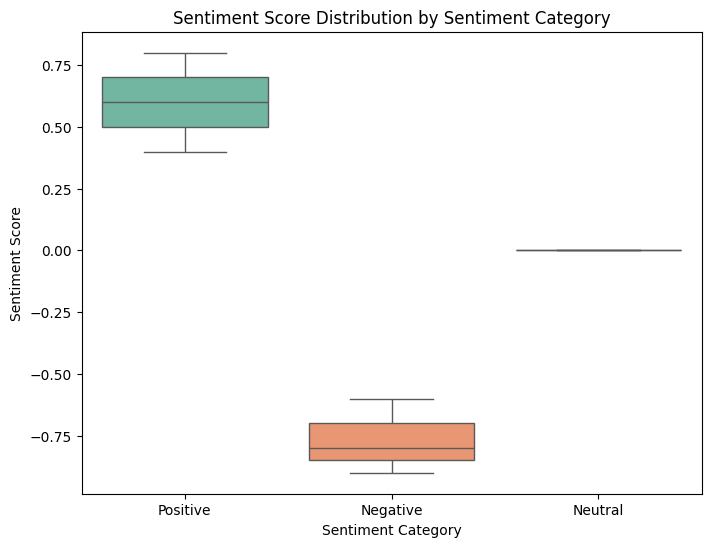

In [79]:
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Label', y='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Score Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

# 6.**Machine Learning Model (Sentiment Classification)**

In [98]:
from sklearn.linear_model import LinearRegression

def train_regression_model(labeled_data):
    # Convert to DataFrame
    df = pd.DataFrame(labeled_data)

In [124]:
 # Split data into features (X) and target (y)
X = df['Topic']
y = df['Sentiment']

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [132]:
 # Train a Linear Regression model (Regression instead of Classification)
model = LinearRegression()
model.fit(X_train_tfidf, y_train)  

LinearRegression()

In [134]:
   # Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [138]:
 # Evaluate the model
print(f"R^2 score: {model.score(X_test_tfidf, y_test)}")
print(f"Predictions: {y_pred}")

R^2 score: -88.81863287420295
Predictions: [ 0.14616448 -0.1202102 ]


# 7.**Visualizations for Combined Display**

In [150]:
def plot_word_cloud(trending_topics):
    text = " ".join(trending_topics)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

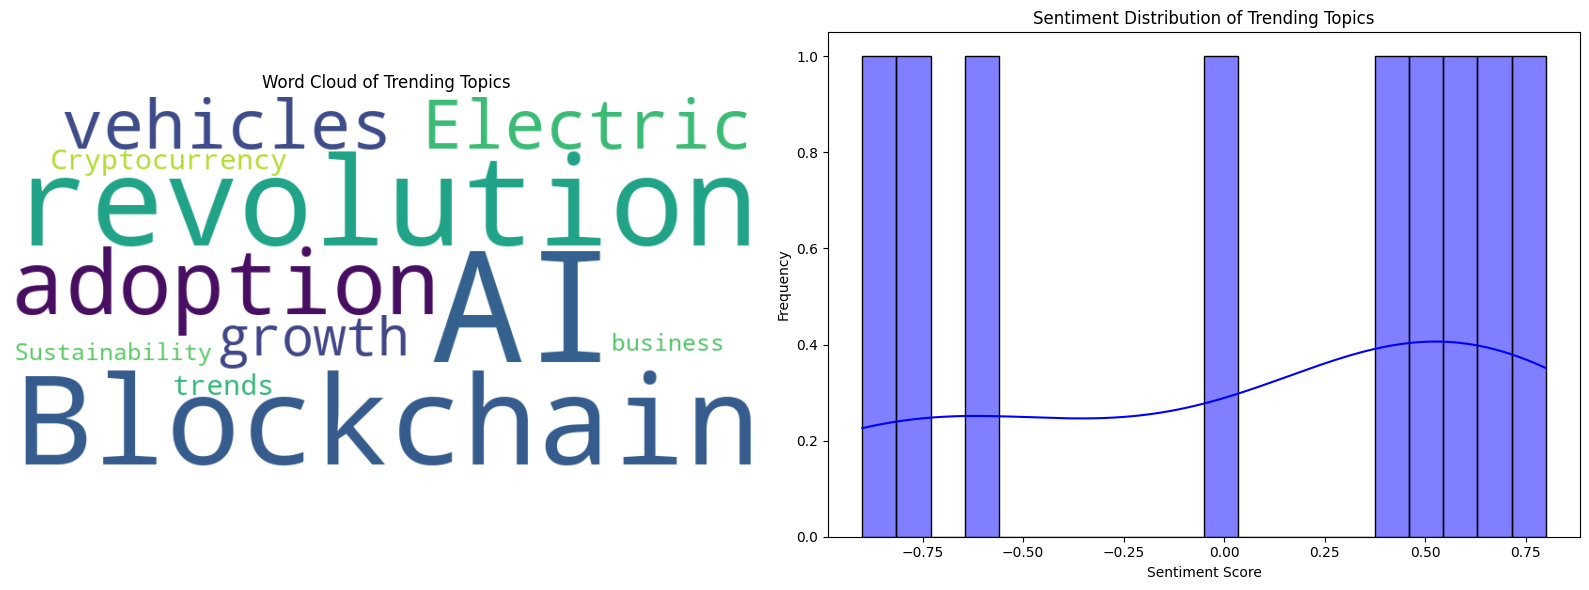

In [152]:
def create_combined_visual(trending_topics, sentiment_data):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    wordcloud = plot_word_cloud(trending_topics)
    axs[0].imshow(wordcloud, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title('Word Cloud of Trending Topics')

    df_sentiment = pd.DataFrame(sentiment_data)
    sns.histplot(df_sentiment['Sentiment'], bins=20, kde=True, color='blue', ax=axs[1])
    axs[1].set_title('Sentiment Distribution of Trending Topics')
    axs[1].set_xlabel('Sentiment Score')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

create_combined_visual(trending_topics, sentiment_data)